In [1]:
import scipy as sc
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

In [216]:
def dfdx(f , x , cosmo):
    Omega_c , Omega_b , Omega_k , Omega_r , alpha_tilde = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k
    
    return ( 3*Omega_m/(2*(Omega_m + Omega_r*np.exp(-x) + Omega_lambda*np.exp(3*x))) - f**2 - (2 - (3*Omega_m*np.exp(-3*x) \
        
           + 4*Omega_r*np.exp(-4*x))/(2*(Omega_m*np.exp(-3*x) + Omega_r*np.exp(-4*x) + Omega_lambda)))*f)


In [217]:
# Define constants

cosmo = [0.56, 0.0 , 0 , 9.2e-5 , 0]                      #  Omega_c , Omega_b , Omega_k , Omega_r , alpha_tilde 
cosmoLCDM = ccl.core.Cosmology(Omega_c=cosmo[0],
                               Omega_b=cosmo[1], 
                               sigma8=0.81,
                               h = 0.67,
                               n_s=0.96,
                               Omega_k=cosmo[2], 
                               Omega_g=cosmo[3])
                   
# create coord times
p = 3
x = np.linspace(0, -3, int(10**p))
a = np.exp(x)
z = 1/a - 1
# create boundary condition for f: value of f at x = 0
BC = (cosmo[0]  + cosmo[1]) ** 0.55


In [218]:

#find solution
f = odeint(dfdx, BC, x, args=(cosmo,), mxstep=int(1e4))
f = np.transpose(f)[0]

#print(f[0] - ccl.growth_rate(cosmoLCDM,1))

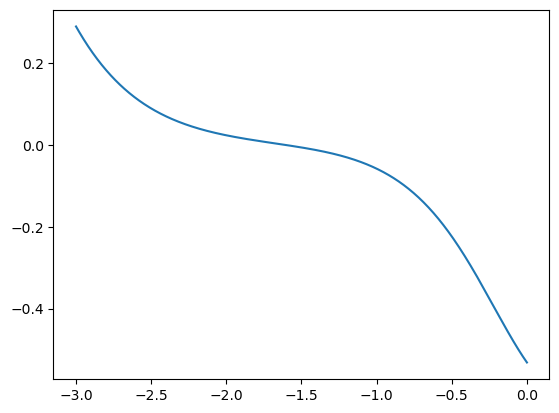

In [219]:
plt.plot(x,dfdx(f,x,cosmo))

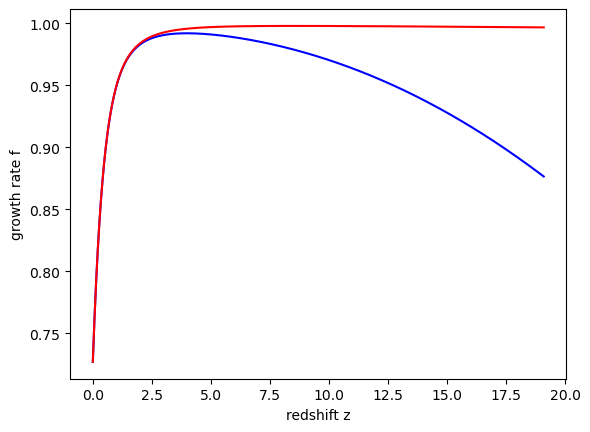

In [206]:
plt.plot(z,f, color = "b")
plt.plot(z, ccl.growth_rate(cosmoLCDM,a), color = "r")
plt.xlabel("redshift z")
plt.ylabel("growth rate f")

#plt.plot(np.exp(x),f - ccl.growth_rate(cosmoLCDM,np.exp(x)))

plt.show()

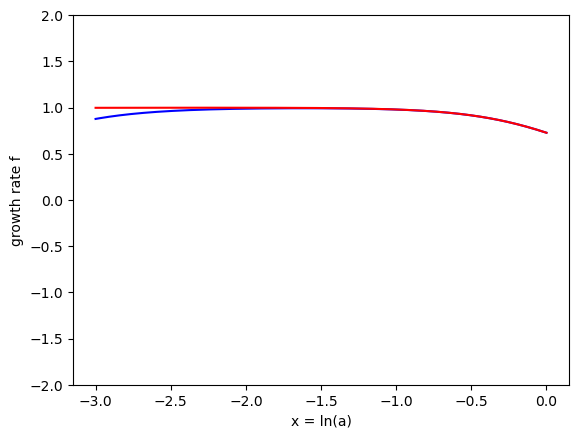

In [207]:
plt.plot(x,f, color = "b")
plt.plot(x, ccl.growth_rate(cosmoLCDM,a), color = "r")

plt.ylabel("growth rate f")
plt.xlabel("x = ln(a)")

plt.ylim(-2,2)

plt.show()